# Imports

In [1]:
# Matplotlib
import matplotlib.pyplot as plt
# TensorFlow
import tensorflow as tf
# Autres Imports
import pandas as pd
import numpy as np
import sys

# Vérification que l'on utilise la bonne version de TensorFlow (version 2)

In [2]:
assert hasattr(tf, "function")

# Utilisation de Fashion MNIST

Fashion MNIST est un dataset déjà préparé qui contient des images de vêtements (chaussures, chemises, talons...). On l'utilise pour entraîner notre modèle à reconnaître les différents types de vêtements (10 possibles).

In [3]:
# Import de Fashion MNIST
fashion_mnist = tf.keras.datasets.fashion_mnist
(images, targets), (_,_) = fashion_mnist.load_data() # recuperation des images et targets du dataset
# On recupere une sous partie du dataset afin de faire les calculs plus rapidement
images = images[:10000]
targets = targets[:10000]

print(images.shape)
print(targets.shape)

(10000, 28, 28)
(10000,)


# Plot d'une des données

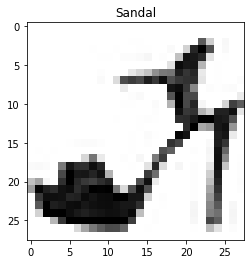

In [4]:
# Création des classes 
targets_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Affichage de la 10eme image
plt.imshow(images[9], cmap="binary") # cmap permet de dire que l'image est en gris donc pas de couleurs
plt.title(targets_names[targets[9]])
plt.show()

# Création du modèle

## Transformation de l'image en un unique vecteur (flatten)

In [5]:
# Creation du modele
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28])) # ajout d'une operation au modele qui "applatit" l'entree 

print("Shape de l'image", images[0:1].shape)
model_output = model.predict(images[0:1])
print("Shape de l'image apres avoir ete flatten", model_output.shape)

Shape de l'image (1, 28, 28)
1/1 [==============================] - 0s 58ms/step
Shape de l'image apres avoir ete flatten (1, 784)


In [6]:
# Flatten
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=[28,28]))

# Ajout des layers de neurones 
# Modele sequentiel donc l'operation Dense va prendre en entree le resultat de l'operation precedente qui dans notre cas est le
# flatten
model.add(tf.keras.layers.Dense(256, activation="relu")) # ajout d'une premiere couche de 256 neurones
model.add(tf.keras.layers.Dense(256, activation="relu")) # ajout d'une deuxieme couche de 128 neurones ou chaque neurone est connecte a tous les autres du layer precedent
model.add(tf.keras.layers.Dense(10, activation="softmax")) # ajout des 10 neurones de sorties permettant de dire de quelle classe est la donnee
# softmax fait en sorte que la somme de la valeur de sorties des 10 neurones soit egale a 1 ce qui transforme ces sorties en probabilite
model_output = model.predict(images[0:1])
print(model_output, targets[0:1])

1/1 [==============================] - 0s 43ms/step
[[6.0444127e-28 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 3.7509973e-37 0.0000000e+00]] [9]


Ici, on voit que notre modèle s'est trompé. En effet, il prédit une probabilité de 1 pour la classe 5 mais la classe attendue était la classe 9. 

# Résumé de notre modèle

In [7]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 256)               200960    
                                                                 
 dense_1 (Dense)             (None, 256)               65792     
                                                                 
 dense_2 (Dense)             (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


# Compilation du modèle

In [8]:
# utilisation d'erreurs afin de minimiser ces dernieres
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd", # utilise la methode de la descente de gradient pour reduire les erreurs (stochastique gradient descent)
    metrics=["accuracy"]
)

In [9]:
# Normalisation des données 
images = (images - np.mean(images)) / np.std(images)

# Entraînement du modèle

In [10]:
history = model.fit(images, targets, epochs=10) # entrainement de notre dataset en minimisant l'erreur grace a la cellule precedente. epochs signifie que l'on va repeter l'operation 10 fois

Epoch 1/10
313/313 [==============================] - 1s 1ms/step - loss: 0.8142 - accuracy: 0.7210
Epoch 2/10
313/313 [==============================] - 0s 1ms/step - loss: 0.5280 - accuracy: 0.8138
Epoch 3/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4640 - accuracy: 0.8346
Epoch 4/10
313/313 [==============================] - 0s 1ms/step - loss: 0.4239 - accuracy: 0.8482
Epoch 5/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3942 - accuracy: 0.8575
Epoch 6/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3723 - accuracy: 0.8679
Epoch 7/10
313/313 [==============================] - 0s 2ms/step - loss: 0.3517 - accuracy: 0.8749
Epoch 8/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3366 - accuracy: 0.8789
Epoch 9/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3198 - accuracy: 0.8866
Epoch 10/10
313/313 [==============================] - 0s 1ms/step - loss: 0.3065 - accuracy: 0.8873

loss fait echo à "sparse_categorical_crossentropy" et l'accuracy est notre metrique. On remarque que loss baisse au cours des itérations ce qui montre qu'à chaque epoch, notre marge d'erreur est réduite. Cela est prouvé aussi par l'accuracy qui elle augmente.

# Visualisation sur l'evolution du loss et de l'accuracy

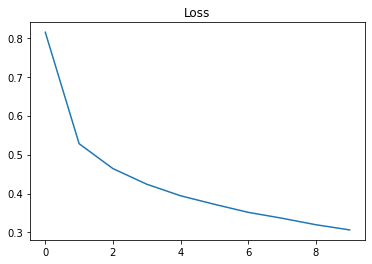

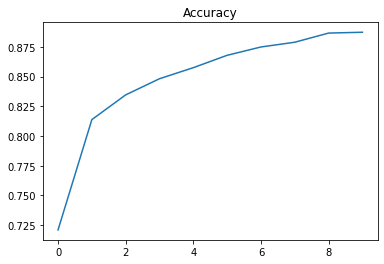

In [11]:
loss_curve = history.history["loss"]
acc_curve = history.history["accuracy"]

plt.plot(loss_curve)
plt.title("Loss")
plt.show()

plt.plot(acc_curve)
plt.title("Accuracy")
plt.show()